# Burgers Equation

Here we solve the advection equation $u_t + u\times u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=10\times\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np

!pip install imageio[ffmpeg]

import imageio.v2 as imageio
import glob

# Flux conservative

In [2]:
##create directory where to save images
print(os.getcwd())

os.makedirs('Burgers/images_FC', exist_ok=True)

os.listdir('./')

C:\Users\giuli\OneDrive\Desktop\Astro\numerical


['.git',
 '.ipynb_checkpoints',
 'Advection_Equation.ipynb',
 'Burgers',
 'Burgers.ipynb',
 'FTCS.ipynb',
 'images_FTCS',
 'images_LAXWENDROFF',
 'images_leapfrog',
 'images_step',
 'l2',
 'l2norm_FTCS.dat',
 'l2norm_LAX.dat',
 'l2norm_LAXWENDROFF.dat',
 'l2norm_LEAPFROG.dat',
 'leapfrog.ipynb',
 'LF.ipynb',
 'LF_step.ipynb',
 'LW.ipynb',
 'LW_step.ipynb',
 'movie_FTCS_cf0.5.mp4',
 'movie_FTCS_cf0.9.mp4',
 'movie_LAXWENDROFF_101.mp4',
 'movie_LAXWENDROFF_202.mp4',
 'movie_leapfrog_101.mp4',
 'movie_leapfrog_202.mp4',
 'movie_leapfrog_cf0.9.mp4',
 'movie_outflow_LAXWENDROFF.mp4',
 'outflow_LAXWENDROFF']

In [3]:
# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the initial condition
x0=5
u_initial_FC = 10*np.exp(-(x-x0)**2)

# Initialize the solution array
u_current_FC = u_initial_FC.copy()

# Define the time step and the final time
cf = 0.5
dt = cf*dx/np.max(u_current_FC)   # Time step
t_final = 0.5

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
#print('Number of iterations=',t_final/dt)

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current_FC**2)/len(u_current_FC)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.005


In [4]:
# Initilize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current_FC)
plt.title('Time='+str(round(t,2)))
#plt.ylim(0,1.1)
plt.savefig('Burgers/images_FC/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current_FC - dt/(2*dx)*(u_current_FC**2 - np.roll(u_current_FC, 1)**2)    
    
    # Update the solution
    u_current_FC = u_next.copy()
    dt = cf*dx/np.max(u_current_FC) 
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current_FC**2)/len(u_current_FC)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current_FC)
        plt.title('Time='+str(round(t,2)))
        plt.text(0,10,'J = 91 \nflux conservative')
        plt.savefig('Burgers/images_FC/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()


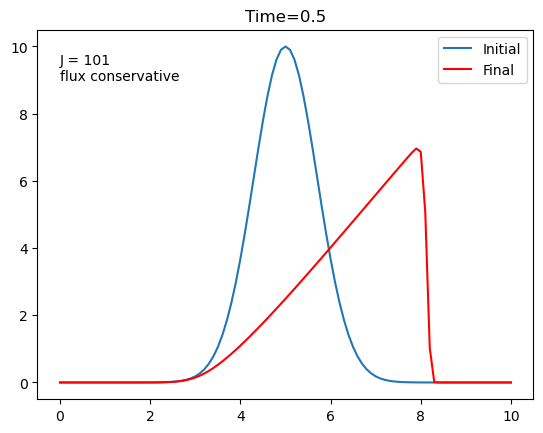

In [5]:
# Plot the final solution
plt.plot(x, u_initial_FC, label='Initial')
plt.plot(x, u_current_FC, label='Final',c='r')
plt.title('Time='+str(round(t,2)))
plt.text(0,9,'J = 101 \nflux conservative')
plt.legend()
plt.savefig('Burgers/image_FC.png', dpi=200)
plt.show()

In [6]:
# set the directory where your images are stored
directory = "Burgers/images_FC"

# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(files)




['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png'] 

['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png']


In [7]:
#get list of images in correct order
images_files = sorted(glob.glob('Burgers/images_FC/fig_*.png'))

#use 'ffmpeg' plugin explicitly and specify codec
output_video_path = os.path.abspath('Burgers/movie_FC.mp4')

with imageio.get_writer(output_video_path, fps=20, codec='libx264') as writer:
    for file in images_files:
        image = imageio.imread(file)
        writer.append_data(image)

In [8]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="Burgers/movie_FC.mp4" type="video/mp4">
</video></div>""")

# Non flux conserviative

In [9]:
##create directory where to save images
print(os.getcwd())

os.makedirs('Burgers/images_NFC', exist_ok=True)

os.listdir('./')

C:\Users\giuli\OneDrive\Desktop\Astro\numerical


['.git',
 '.ipynb_checkpoints',
 'Advection_Equation.ipynb',
 'Burgers',
 'Burgers.ipynb',
 'FTCS.ipynb',
 'images_FTCS',
 'images_LAXWENDROFF',
 'images_leapfrog',
 'images_step',
 'l2',
 'l2norm_FTCS.dat',
 'l2norm_LAX.dat',
 'l2norm_LAXWENDROFF.dat',
 'l2norm_LEAPFROG.dat',
 'leapfrog.ipynb',
 'LF.ipynb',
 'LF_step.ipynb',
 'LW.ipynb',
 'LW_step.ipynb',
 'movie_FTCS_cf0.5.mp4',
 'movie_FTCS_cf0.9.mp4',
 'movie_LAXWENDROFF_101.mp4',
 'movie_LAXWENDROFF_202.mp4',
 'movie_leapfrog_101.mp4',
 'movie_leapfrog_202.mp4',
 'movie_leapfrog_cf0.9.mp4',
 'movie_outflow_LAXWENDROFF.mp4',
 'outflow_LAXWENDROFF']

In [10]:
# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the initial condition
x0=5
u_initial = 10*np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

# Define the time step and the final time
cf = 0.5
dt = cf*dx/np.max(u_current)   # Time step
t_final = 0.5

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
#print('Number of iterations=',t_final/dt)

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.005


In [11]:
# Initilize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
#plt.ylim(0,1.1)
plt.savefig('Burgers/images_NFC/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current - dt/dx*u_current*(u_current - np.roll(u_current, 1))    
    
    # Update the solution
    u_current = u_next.copy()
    dt = cf*dx/np.max(u_current) 
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.text(0,9,'J = 101 \nnon-flux conservative')
        plt.savefig('Burgers/images_NFC/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()


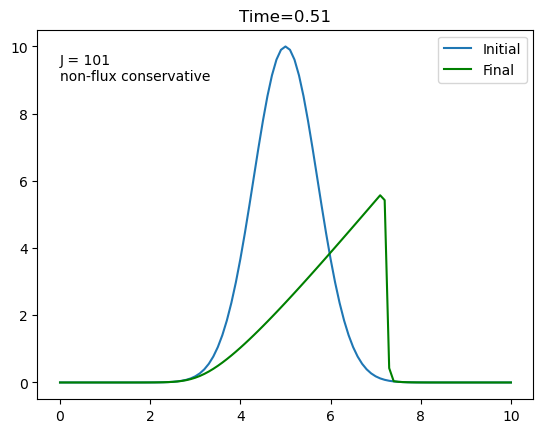

In [12]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final',c='g')
plt.title('Time='+str(round(t,2)))
plt.text(0,9,'J = 101 \nnon-flux conservative')
plt.legend()
plt.savefig('Burgers/image_NFC.png', dpi=200)
plt.show()

In [13]:
# set the directory where your images are stored
directory = "Burgers/images_NFC"

# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(files)




['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png'] 

['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png']


In [14]:
#get list of images in correct order
images_files = sorted(glob.glob('Burgers/images_NFC/fig_*.png'))

#use 'ffmpeg' plugin explicitly and specify codec
output_video_path = os.path.abspath('Burgers/movie_NFC.mp4')

with imageio.get_writer(output_video_path, fps=20, codec='libx264') as writer:
    for file in images_files:
        image = imageio.imread(file)
        writer.append_data(image)

In [15]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="Burgers/movie_NFC.mp4" type="video/mp4">
</video></div>""")

# Comparison

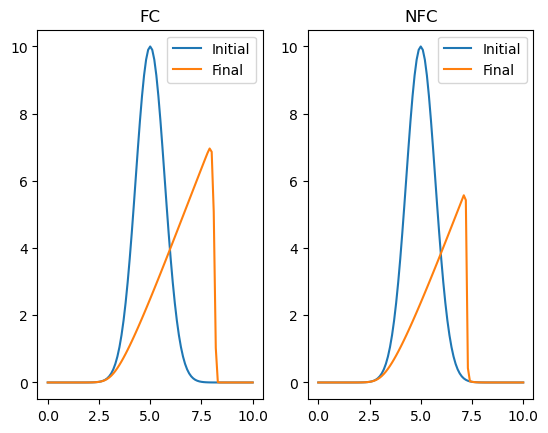

In [16]:
fig, axes = plt.subplots(1,2)

# Plot the final solution
axes[0].plot(x, u_initial_FC, label='Initial')
axes[0].plot(x, u_current_FC, label='Final')
axes[0].set_title('FC')
axes[0].legend()

axes[1].plot(x, u_initial, label='Initial')
axes[1].plot(x, u_current, label='Final')
axes[1].set_title('NFC')
axes[1].legend()

plt.show()

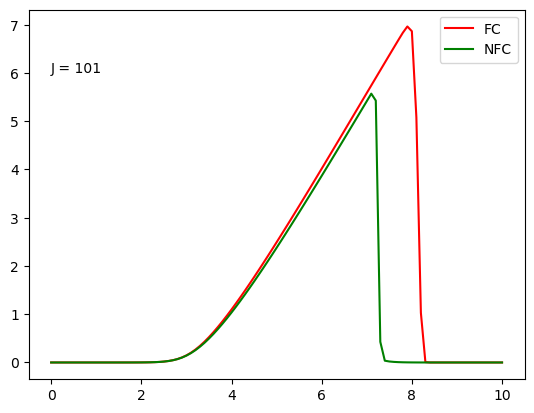

In [17]:
plt.plot(x, u_current_FC, label='FC',c='r')
plt.plot(x, u_current, label='NFC',c='g')
plt.legend()
plt.text(0,6,'J = 101')
plt.savefig('Burgers/comparison.png', dpi=200)
plt.show()

# J = 505

In [18]:
##create directory where to save images
print(os.getcwd())

os.makedirs('Burgers/images_505', exist_ok=True)

os.listdir('./')

C:\Users\giuli\OneDrive\Desktop\Astro\numerical


['.git',
 '.ipynb_checkpoints',
 'Advection_Equation.ipynb',
 'Burgers',
 'Burgers.ipynb',
 'FTCS.ipynb',
 'images_FTCS',
 'images_LAXWENDROFF',
 'images_leapfrog',
 'images_step',
 'l2',
 'l2norm_FTCS.dat',
 'l2norm_LAX.dat',
 'l2norm_LAXWENDROFF.dat',
 'l2norm_LEAPFROG.dat',
 'leapfrog.ipynb',
 'LF.ipynb',
 'LF_step.ipynb',
 'LW.ipynb',
 'LW_step.ipynb',
 'movie_FTCS_cf0.5.mp4',
 'movie_FTCS_cf0.9.mp4',
 'movie_LAXWENDROFF_101.mp4',
 'movie_LAXWENDROFF_202.mp4',
 'movie_leapfrog_101.mp4',
 'movie_leapfrog_202.mp4',
 'movie_leapfrog_cf0.9.mp4',
 'movie_outflow_LAXWENDROFF.mp4',
 'outflow_LAXWENDROFF']

In [19]:
# Define the domain
L = 10.0     # Domain length
nx = 505    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the initial condition
x0=5
u_initial = 10*np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

# Define the time step and the final time
cf = 0.5
dt = cf*dx/np.max(u_current)   # Time step
t_final = 0.5

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
#print('Number of iterations=',t_final/dt)

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 505
dx= 0.01984126984126984
dt= 0.000992063492063492


In [20]:
# Initilize time and iteration counter
t = 0.0
i = 0

#solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current - dt/dx*u_current*(u_current - np.roll(u_current, 1))    
    
    # Update the solution
    u_current = u_next.copy()
    dt = cf*dx/np.max(u_current) 
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

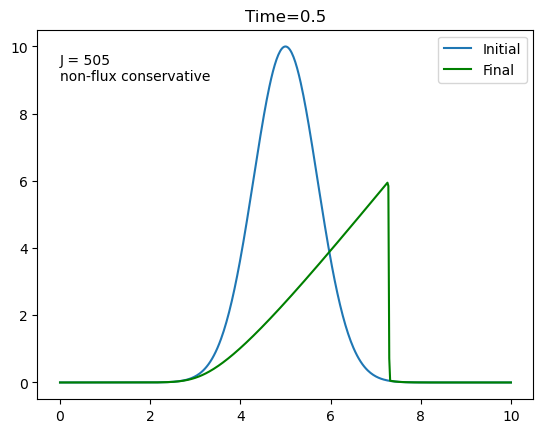

In [21]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final',c='g')
plt.title('Time='+str(round(t,2)))
plt.text(0,9,'J = 505 \nnon-flux conservative')
plt.legend()
plt.savefig('Burgers/images_505/image_NFC_505.png', dpi=200)
plt.show()

In [22]:
# Define the domain
L = 10.0     # Domain length
nx = 505    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the initial condition
x0=5
u_initial_FC = 10*np.exp(-(x-x0)**2)

# Initialize the solution array
u_current_FC = u_initial_FC.copy()

# Define the time step and the final time
cf = 0.5
dt = cf*dx/np.max(u_current_FC)   # Time step
t_final = 0.5

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
#print('Number of iterations=',t_final/dt)

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current_FC**2)/len(u_current_FC)))

time=[]
time.append(0.0)

nx= 505
dx= 0.01984126984126984
dt= 0.000992063492063492


In [23]:
# Initilize time and iteration counter
t = 0.0
i = 0

#solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current_FC - dt/(2*dx)*(u_current_FC**2 - np.roll(u_current_FC, 1)**2)    
    
    # Update the solution
    u_current_FC = u_next.copy()
    dt = cf*dx/np.max(u_current_FC) 
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current_FC**2)/len(u_current_FC)))
    time.append(t)


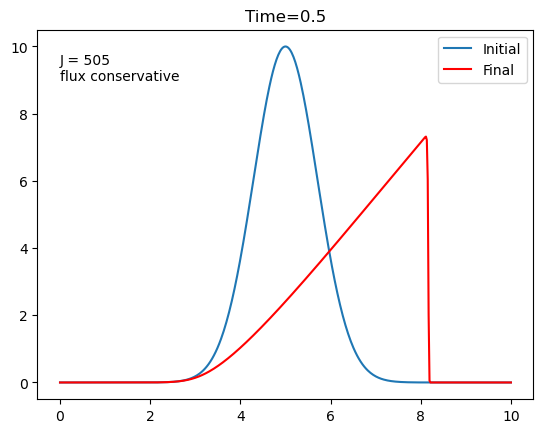

In [24]:
# Plot the final solution
plt.plot(x, u_initial_FC, label='Initial')
plt.plot(x, u_current_FC, label='Final',c='r')
plt.title('Time='+str(round(t,2)))
plt.text(0,9,'J = 505 \nflux conservative')
plt.legend()
plt.savefig('Burgers/images_505/image_FC_505.png', dpi=200)
plt.show()

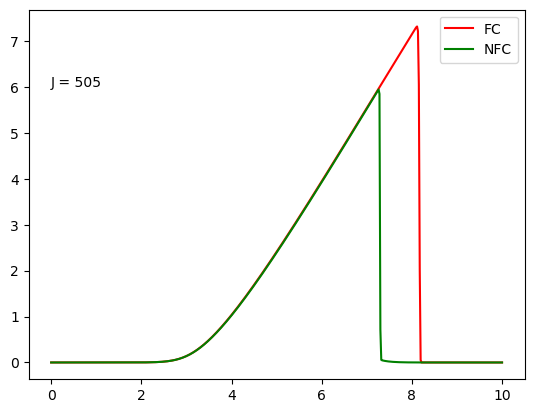

In [26]:
plt.plot(x, u_current_FC, label='FC',c='r')
plt.plot(x, u_current, label='NFC',c='g')
plt.legend()
plt.text(0,6,'J = 505')
plt.savefig('Burgers/images_505/comparison_505.png', dpi=200)
plt.show()